<a href="https://colab.research.google.com/github/zaiii145/EV_Analysis_Zaina/blob/main/EV_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing Values:
 VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        20
Base MSRP                                             20
Legislative District                                 553
DOL Vehicle ID                                         0
Vehicle Location                                      11
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64



/tmp/ipython-input-4-2404191967.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Base MSRP'].replace(0, np.nan, inplace=True)
/tmp/ipython-input-4-2404191967.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 


Duplicates: 0

Top 5 Makes:
 Make
TESLA        105001
CHEVROLET     17840
NISSAN        15892
FORD          13270
KIA           11978
Name: count, dtype: int64

Top 5 Models:
 Model
MODEL Y    51528
MODEL 3    37427
LEAF       13950
MODEL S     7912
BOLT EV     7463
Name: count, dtype: int64

County Distribution:
 County
King            122819
Snohomish        30587
Pierce           20534
Clark            15055
Thurston          9081
                 ...  
St. Clair            1
Palm Beach           1
Anchorage            1
Kauai                1
Williamsburg         1
Name: count, Length: 215, dtype: int64

EVs by Model Year:
 Model Year
2000        8
2002        2
2003        1
2008       17
2010       23
2011      656
2012     1462
2013     4168
2014     3364
2015     4613
2016     5302
2017     8755
2018    14504
2019    11055
2020    12390
2021    20794
2022    29337
2023    59088
2024    49799
2025    20820
2026     1186
Name: count, dtype: int64

Average Electric Range: 79.7346

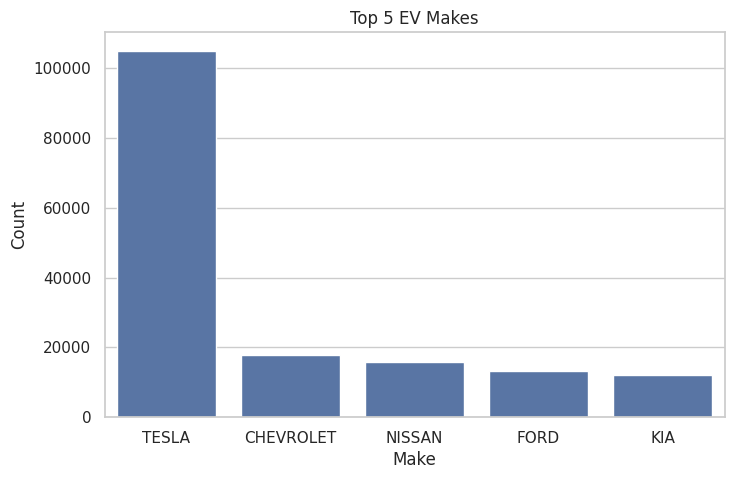

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24125 (\N{CJK UNIFIED IDEOGRAPH-5E3D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24125 (\N{CJK UNIFIED IDEOGRAPH-5E3D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


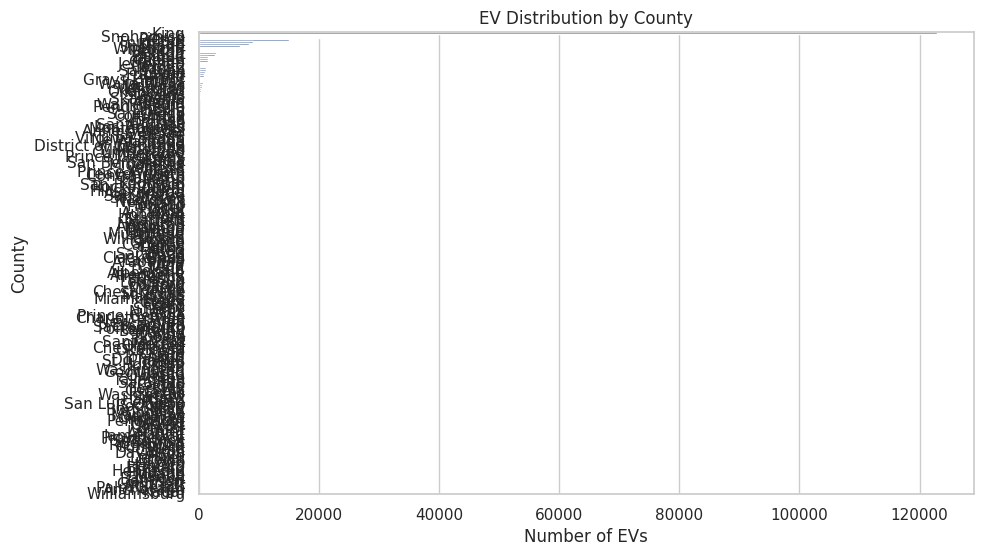

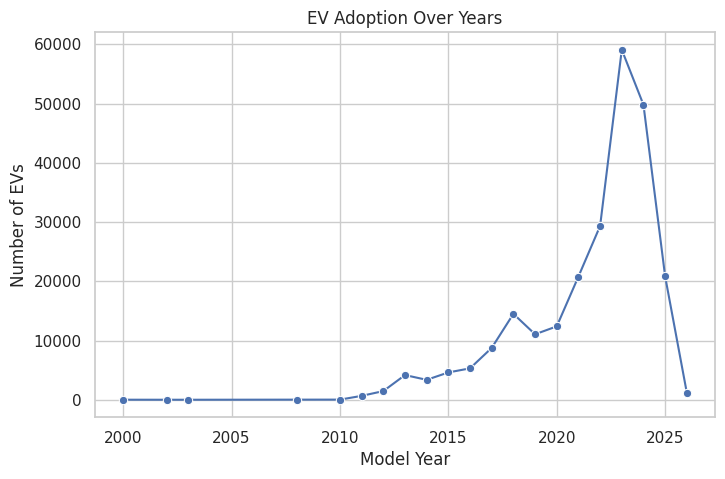

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


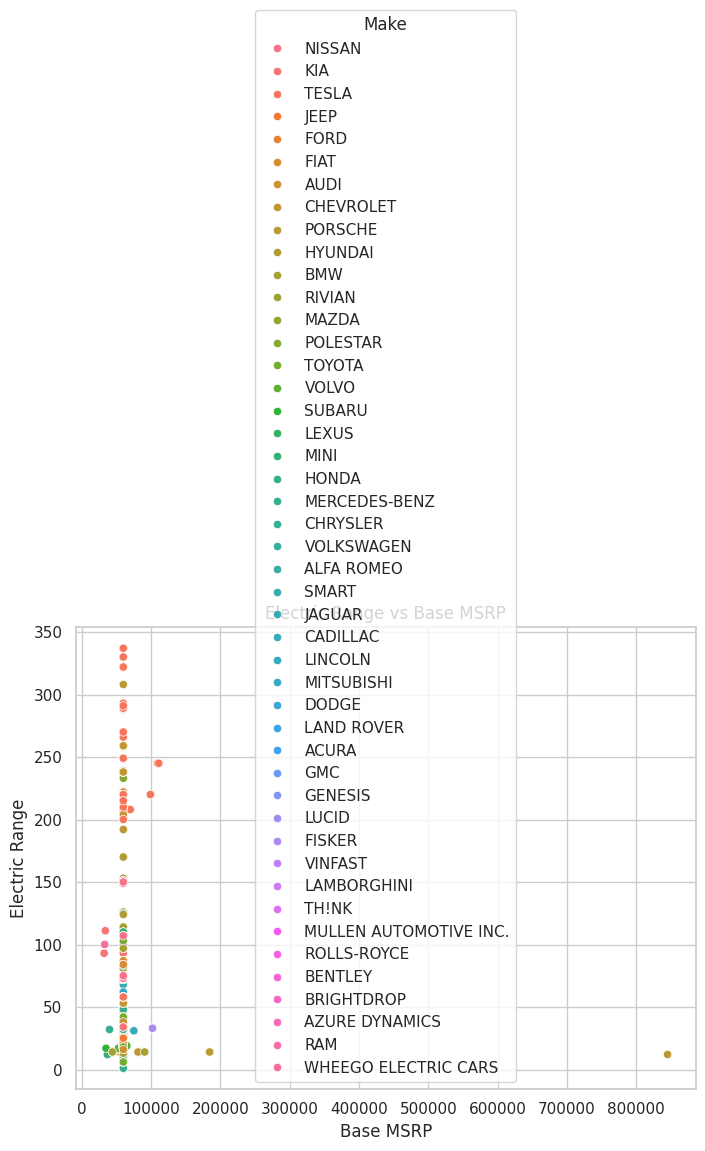

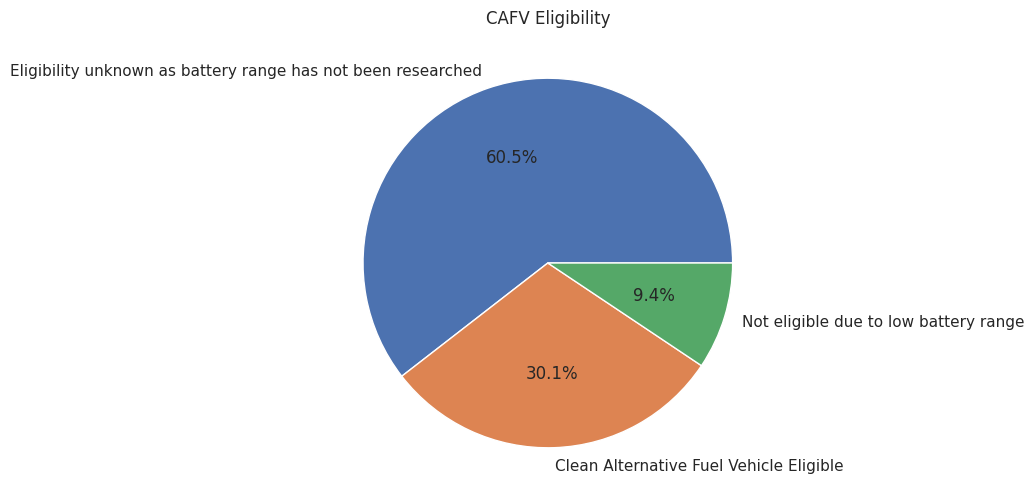


R² Score: 0.30422681512893646

Feature Coefficients:
 Model Year                    -9.240649e+00
Base MSRP                      6.042869e-04
Make_ALFA ROMEO               -2.488592e+01
Make_AUDI                     -1.439803e+01
Make_AZURE DYNAMICS           -1.221284e+02
Make_BENTLEY                  -2.609626e+01
Make_BMW                      -3.163680e+01
Make_BRIGHTDROP               -5.544390e+00
Make_CADILLAC                 -5.018476e+00
Make_CHEVROLET                 1.175320e+01
Make_CHRYSLER                 -4.907801e+01
Make_DODGE                    -2.155075e+01
Make_FIAT                     -4.572390e+01
Make_FISKER                   -1.883176e+01
Make_FORD                     -3.688633e+01
Make_GENESIS                  -2.982741e+00
Make_GMC                       3.051429e+00
Make_HONDA                    -2.383967e+01
Make_HYUNDAI                  -5.028805e+00
Make_JAGUAR                    1.058489e+02
Make_JEEP                     -4.181815e+01
Make_KIA             

In [4]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the Excel file
df = pd.read_excel('/content/Electric_Vehicle_Population_Data (1).xlsx')  # Update path as needed

# Display the first few rows
df.head()

# -------------------------------------------
# 1. Data Cleaning
# -------------------------------------------

# Check missing values
print("Missing Values:\n", df.isnull().sum())

# Check zero values in 'Base MSRP' and 'Electric Range'
print("\nZero Base MSRP count:", (df['Base MSRP'] == 0).sum())
print("Zero Electric Range count:", (df['Electric Range'] == 0).sum())

# Replace zeros with NaN for meaningful columns
df['Base MSRP'].replace(0, np.nan, inplace=True)
df['Electric Range'].replace(0, np.nan, inplace=True)

# Fill missing with median
df['Base MSRP'].fillna(df['Base MSRP'].median(), inplace=True)
df['Electric Range'].fillna(df['Electric Range'].median(), inplace=True)

# Check for duplicates
print("\nDuplicates:", df.duplicated().sum())
df = df.drop_duplicates()

# Anonymize VIN while maintaining uniqueness
df['VIN (1-10)'] = df['VIN (1-10)'].apply(lambda x: hash(x))

# -------------------------------------------
# 2. Data Exploration
# -------------------------------------------

# Top 5 Makes
top_makes = df['Make'].value_counts().head(5)
print("\nTop 5 Makes:\n", top_makes)

# Top 5 Models
top_models = df['Model'].value_counts().head(5)
print("\nTop 5 Models:\n", top_models)

# EV distribution by County
county_distribution = df['County'].value_counts()
print("\nCounty Distribution:\n", county_distribution)

# EV Adoption by Model Year
ev_by_year = df['Model Year'].value_counts().sort_index()
print("\nEVs by Model Year:\n", ev_by_year)

# Average Electric Range
avg_range = df['Electric Range'].mean()
print("\nAverage Electric Range:", avg_range)

# CAFV Eligibility Percentage
cafv_percent = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(normalize=True) * 100
print("\nCAFV Eligibility %:\n", cafv_percent)

# Electric Range by Make and Model
range_by_make_model = df.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False)
print("\nRange by Make and Model:\n", range_by_make_model)

# Average Base MSRP by Model
avg_msrp_by_model = df.groupby('Model')['Base MSRP'].mean().sort_values(ascending=False)
print("\nAverage MSRP by Model:\n", avg_msrp_by_model)

# -------------------------------------------
# 3. Data Visualization
# -------------------------------------------

sns.set(style="whitegrid")

# Bar Chart - Top 5 Makes
plt.figure(figsize=(8,5))
sns.barplot(x=top_makes.index, y=top_makes.values)
plt.title('Top 5 EV Makes')
plt.ylabel('Count')
plt.xlabel('Make')
plt.show()

# Heatmap - EV Distribution by County
plt.figure(figsize=(10,6))
sns.barplot(y=county_distribution.index, x=county_distribution.values)
plt.title('EV Distribution by County')
plt.xlabel('Number of EVs')
plt.ylabel('County')
plt.show()

# Line Chart - EV Adoption by Model Year
plt.figure(figsize=(8,5))
sns.lineplot(x=ev_by_year.index, y=ev_by_year.values, marker="o")
plt.title('EV Adoption Over Years')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs')
plt.show()

# Scatter Plot - Electric Range vs MSRP
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Base MSRP', y='Electric Range', hue='Make')
plt.title('Electric Range vs Base MSRP')
plt.xlabel('Base MSRP')
plt.ylabel('Electric Range')
plt.show()

# Pie Chart - CAFV Eligibility
plt.figure(figsize=(6,6))
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('CAFV Eligibility')
plt.ylabel('')
plt.show()


# -------------------------------------------
# 4. Linear Regression Model
# -------------------------------------------

# Select features and target
features = df[['Model Year', 'Base MSRP', 'Make']]
target = df['Electric Range']

# Encode 'Make' categorical variable
features = pd.get_dummies(features, columns=['Make'], drop_first=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Build Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# R2 Score
r2 = r2_score(y_test, y_pred)
print("\nR² Score:", r2)

# Model Coefficients
coefficients = pd.Series(model.coef_, index=X_train.columns)
print("\nFeature Coefficients:\n", coefficients)

